# Exploratory Data Analysis

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/agri-food-co2-emission-dataset-forecasting-ml/Agrofood_co2_emission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## Reading data as CSV

In [3]:
df=pd.read_csv('/kaggle/input/agri-food-co2-emission-dataset-forecasting-ml/Agrofood_co2_emission.csv')

---

## Basic data description

In [4]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

Here we noticed that in some particular fields there are a lot of NA values. While processing the data we must take in to consideration whether to impute the values or to drop the NA values.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


---

# Visualization and Plotting

<Axes: >

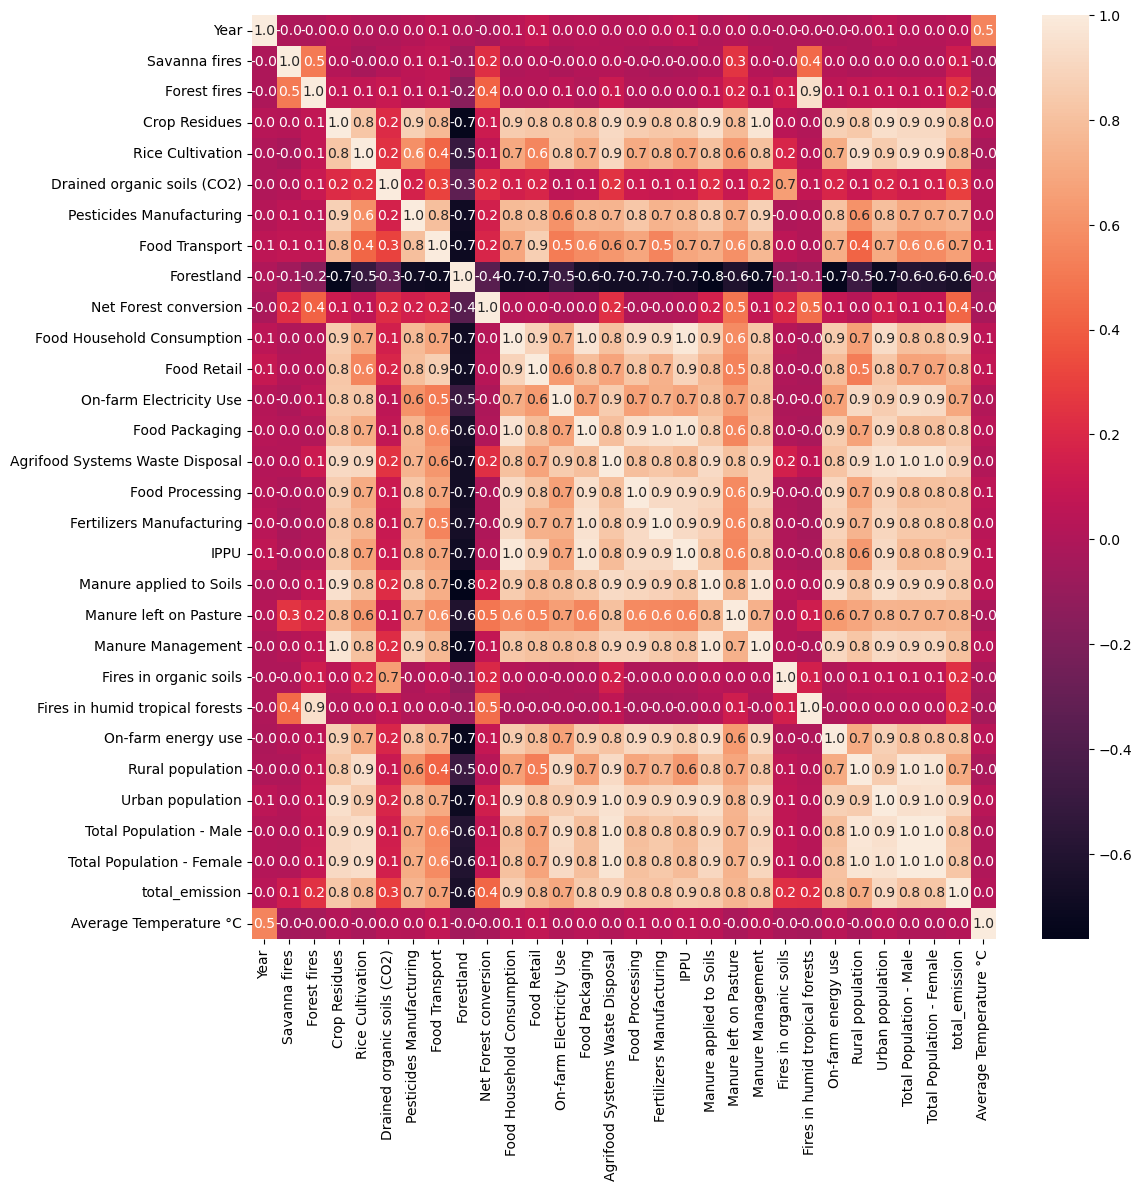

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt="1.1f")

<Axes: xlabel='Year'>

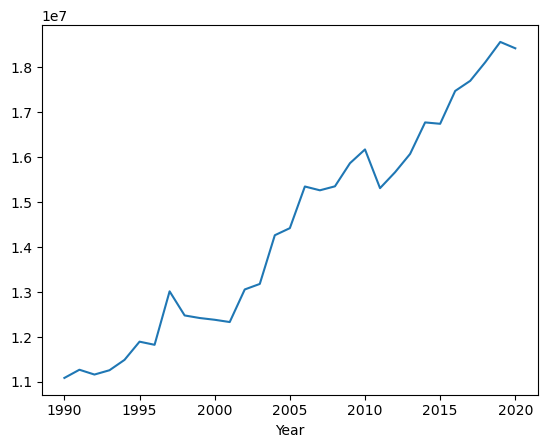

In [8]:
df.groupby('Year')['total_emission'].sum().plot()

<Axes: xlabel='Area'>

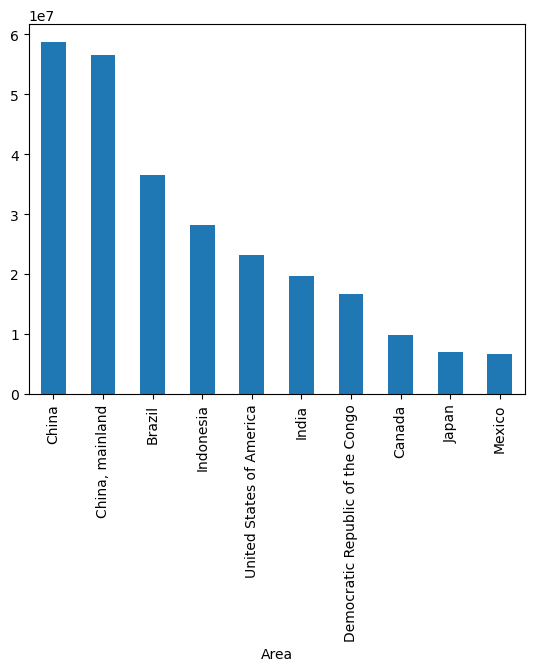

In [9]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=False).head(10).plot.bar()

Here we plot the countries with the **highest** total emissions from 1990 to 2020.

<Axes: xlabel='Area'>

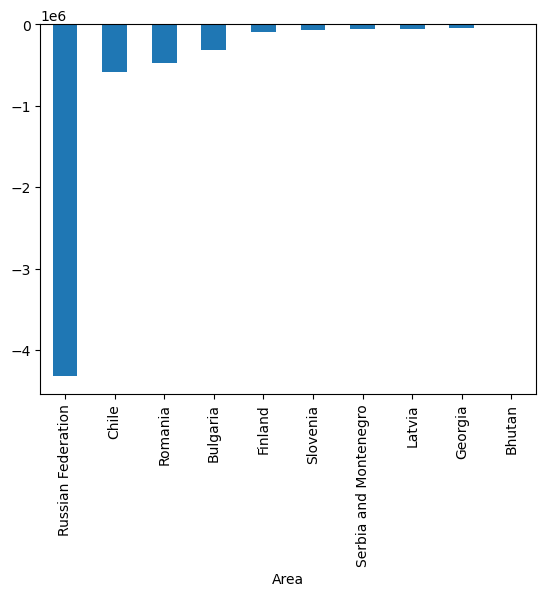

In [10]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=True).head(10).plot.bar()

Here we plot the countries with the **lowest** total emissions from 1990 to 2020.